In [1]:
import pandas as pd

# la dataset d'origine : 

In [2]:
df = pd.read_csv('duplicated_company_names.csv')  

# drop the unamed colone 

In [3]:
# Supprimer la première colonne 'Unnamed: 0' (si elle existe)
if 'Unnamed: 0' in df.columns:
    new_df = df.drop(columns=['Unnamed: 0'])
# Enregistrer la nouvelle DataFrame dans un nouveau fichier csv
new_df.to_csv('new_dataset.csv', index=False)

In [4]:
df = pd.read_csv('new_dataset.csv')  

# afficher les rendandances dans chaque colonne 

In [5]:
# Créer une nouvelle DataFrame pour stocker les résultats
dup_df = pd.DataFrame(columns=['Colonne', 'Nombre de duplicatas'])

# Pour chaque colonne, détecter le nombre de lignes redondantes
for column in df.columns:
    duplicates = df.duplicated(subset=[column])
    dup_df = dup_df.append({'Colonne': column, 'Nombre de duplicatas': duplicates.sum()}, ignore_index=True)

# Afficher la DataFrame avec les résultats
print(dup_df)

                Colonne Nombre de duplicatas
0          Name_company                 1253
1  Name_company_cleaned                 2652
2                Ticker                 7453
3               Country                23027
4              Industry                23078
5                Sector                23142
6               column1                 6704


# y a t-il de redandadnce par rapport a tous les colonnes a la fois ??

In [6]:
# Détecter les lignes complètement dupliquées
duplicates = df.duplicated()

# Créer une nouvelle DataFrame pour stocker les lignes dupliquées
dup_rows_df = df[duplicates]

# Afficher la DataFrame avec les lignes dupliquées
print(dup_rows_df)

Empty DataFrame
Columns: [Name_company, Name_company_cleaned, Ticker, Country, Industry, Sector, column1]
Index: []


# => aucune ligne est  redandente par rapport à toutes les colonnes 

In [7]:
# Détecter les valeurs manquantes
missing_values = df.isna()

# Afficher le nombre de valeurs manquantes par colonne
print(missing_values.sum())

Name_company               1
Name_company_cleaned       0
Ticker                  5578
Country                   81
Industry                   0
Sector                     1
column1                    0
dtype: int64


# drop the colunm Ticker 

In [8]:
new_df = df.drop("Ticker", axis=1)
new_df

,Name_company,Name_company_cleaned,Country,Industry,Sector,column1
0,10x Genomics Inc. Class A Common Stock,10x Genomics,United States,Medical Equipment & Supplies,Health Care,10x genomics
1,10X Genomics Inc,10X Genomics,United States,Medical Equipment & Supplies,Health Care,10x genomics
2,1933 Industries Inc,1933 Industries,Canada,Biotechnology & Pharmaceuticals,Health Care,1933 industries
3,1Life Healthcare Inc,1Life Healthcare,United States,Software & IT Services,Technology & Communications,1life healthcare
4,1st Source Corporation Common Stock,1st Source,United States,Commercial Banks,Financials,1st source
...,...,...,...,...,...,...
23150,Zymergen Inc,Zymergen,United States,Chemicals,Resource Transformation,zymergen
23151,"Zynerba Pharmaceuticals, Inc.",Zynerba Pharmaceuticals,United States,Biotechnology & Pharmaceuticals,Health Care,zynerba pharmaceuticals
23152,Zynex Inc. Common Stock,Zynex,United States,Medical Equipment & Supplies,Health Care,zynex
23153,Zynga Inc.,Zynga,United States,Software & IT Services,Technology & Communications,zynga


### J'ai 81 comapny dont le nom de leurs countries n'est par mentioné

In [9]:
# Filtrer les sociétés avec le nom de pays manquant
missing_country_companies = new_df[new_df['Country'].isna()]

# Afficher les sociétés avec le nom de pays manquant
missing_country_companies

,Name_company,Name_company_cleaned,Country,Industry,Sector,column1
631,AIMA Technology Group Co Ltd,AIMA Technology Group,NaN,Toys & Sporting Goods,Consumer Goods,aima technology group
665,Airtel Malawi PLC,Airtel Malawi,NaN,Telecommunication Services,Technology & Communications,airtel malawi
1149,AML Foods Ltd,AML Foods,NaN,Food Retailers & Distributors,Food & Beverage,aml foods
1267,Anhui Huaertai Chemical Co Ltd,Anhui Huaertai Chemical,NaN,Chemicals,Resource Transformation,anhui huaertai chemical
1753,Aseguradora Agricola Comercial SA,Aseguradora Agricola Comercial,NaN,Insurance,Financials,aseguradora agricola comercial
...,...,...,...,...,...,...
20592,Tianjin Yiyi Hygiene Products Co Ltd,Tianjin Yiyi Hygiene Products,NaN,Household & Personal Products,Consumer Goods,tianjin yiyi hygiene products
23037,Zhejiang Shaoxing RuiFeng Rural Commercial Ban...,Zhejiang Shaoxing RuiFeng Rural Commercial Bank,NaN,Commercial Banks,Financials,zhejiang shaoxing ruifeng rural commercial bank
23041,Zhejiang Truelove Vogue Co Ltd,Zhejiang Truelove Vogue,NaN,"Apparel, Accessories & Footwear",Consumer Goods,zhejiang truelove vogue
23063,Zhengzhou Qianweiyangchu Food Co Ltd,Zhengzhou Qianweiyangchu Food,NaN,Processed Foods,Food & Beverage,zhengzhou qianweiyangchu food


In [10]:
total_companies = len(new_df)  # Nombre total de sociétés
percentage_missing_country = (81 / total_companies)   # Calcul du pourcentage

print("Pourcentage de sociétés sans nom de pays:", percentage_missing_country)


Pourcentage de sociétés sans nom de pays: 0.0034981645432951847


### => On peut suprimer ces companies comme ne represente que 0.003 de notre données 

In [11]:
new_df = new_df.dropna(subset=['Country'])
new_df

,Name_company,Name_company_cleaned,Country,Industry,Sector,column1
0,10x Genomics Inc. Class A Common Stock,10x Genomics,United States,Medical Equipment & Supplies,Health Care,10x genomics
1,10X Genomics Inc,10X Genomics,United States,Medical Equipment & Supplies,Health Care,10x genomics
2,1933 Industries Inc,1933 Industries,Canada,Biotechnology & Pharmaceuticals,Health Care,1933 industries
3,1Life Healthcare Inc,1Life Healthcare,United States,Software & IT Services,Technology & Communications,1life healthcare
4,1st Source Corporation Common Stock,1st Source,United States,Commercial Banks,Financials,1st source
...,...,...,...,...,...,...
23150,Zymergen Inc,Zymergen,United States,Chemicals,Resource Transformation,zymergen
23151,"Zynerba Pharmaceuticals, Inc.",Zynerba Pharmaceuticals,United States,Biotechnology & Pharmaceuticals,Health Care,zynerba pharmaceuticals
23152,Zynex Inc. Common Stock,Zynex,United States,Medical Equipment & Supplies,Health Care,zynex
23153,Zynga Inc.,Zynga,United States,Software & IT Services,Technology & Communications,zynga


In [12]:
# Grouper le DataFrame par pays et nom d'entreprise
grouped = new_df.groupby(['Country', 'Name_company_cleaned'])

# Compter le nombre d'occurrences de chaque nom d'entreprise par pays
name_counts = grouped.size().reset_index(name='Count')

# Afficher les résultats
print(name_counts)

         Country        Name_company_cleaned  Count
0       Anguilla                       Kidoz      1
1      Argentina                        AT T      1
2      Argentina                 Banco Macro      1
3      Argentina         Banco Santander Rio      1
4      Argentina           Bodegas Esmeralda      1
...          ...                         ...    ...
23017   Zimbabwe          First Capital Bank      1
23018   Zimbabwe  GetBucks MicroFinance Bank      1
23019   Zimbabwe  GetBucks Microfinance Bank      1
23020   Zimbabwe     Lafarge Cement Zimbabwe      1
23021   Zimbabwe                        Seed      1

[23022 rows x 3 columns]


# Les duplications :

In [13]:
# Créer une nouvelle DataFrame pour stocker les résultats
dup_df = pd.DataFrame(columns=['Ligne', 'Nombre de redondances'])

# Détecter les lignes répétées par rapport aux colonnes "Country", "column1", "Sector" et "Industry"
duplicates = df.duplicated(subset=["Country", "column1", "Sector", "Industry"])

# Pour chaque ligne répétée, détecter le nombre de redondances
for index, is_duplicate in enumerate(duplicates):
    if is_duplicate:
        row = df.loc[index]
        count_duplicates = df[(df["Country"] == row["Country"]) & (df["column1"] == row["column1"]) & (df["Sector"] == row["Sector"]) & (df["Industry"] == row["Industry"])].shape[0]
        dup_df = dup_df.append({'Ligne': index, 'Nombre de redondances': count_duplicates}, ignore_index=True)

# Afficher la DataFrame avec les résultats
dup_df


,Ligne,Nombre de redondances
0,1,2
1,7,2
2,10,2
3,12,2
4,20,2
...,...,...
3577,23109,2
3578,23127,2
3579,23131,2
3580,23133,2


In [14]:
# Créer une nouvelle DataFrame pour stocker les résultats
dup_df = pd.DataFrame(columns=['Ligne', 'Nombre de redondances'])

# Détecter les lignes répétées par rapport aux colonnes "Country", "column1", "Sector", "Industry" et "Name_company"
duplicates = df.duplicated(subset=["Country", "column1", "Sector", "Industry", "Name_company"])

# Pour chaque ligne répétée, détecter le nombre de redondances
for index, is_duplicate in enumerate(duplicates):
    if is_duplicate:
        row = df.loc[index]
        count_duplicates = df[(df["Country"] == row["Country"]) & (df["column1"] == row["column1"]) & (df["Sector"] == row["Sector"]) & (df["Industry"] == row["Industry"]) & (df["Name_company"] == row["Name_company"])].shape[0]
        dup_df = dup_df.append({'Ligne': index, 'Nombre de redondances': count_duplicates}, ignore_index=True)

# Afficher la DataFrame avec les résultats

dup_df

,Ligne,Nombre de redondances


# => La seule colonne reponsable de la redendance est Name_company !!!!!!!!!!

In [15]:
# Conserver une seule ligne pour chaque groupe de lignes répétées
unique_rows = df.drop_duplicates(subset=["Country", "column1"])

# Afficher les lignes uniques
unique_rows

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
0,10x Genomics Inc. Class A Common Stock,10x Genomics,NaN,United States,Medical Equipment & Supplies,Health Care,10x genomics
2,1933 Industries Inc,1933 Industries,TGIF,Canada,Biotechnology & Pharmaceuticals,Health Care,1933 industries
3,1Life Healthcare Inc,1Life Healthcare,ONEM,United States,Software & IT Services,Technology & Communications,1life healthcare
4,1st Source Corporation Common Stock,1st Source,NaN,United States,Commercial Banks,Financials,1st source
5,"22nd Century Group, Inc.",22nd Century Group,XXII,United States,Tobacco,Food & Beverage,22nd century group
...,...,...,...,...,...,...,...
23150,Zymergen Inc,Zymergen,ZY,United States,Chemicals,Resource Transformation,zymergen
23151,"Zynerba Pharmaceuticals, Inc.",Zynerba Pharmaceuticals,ZYNE,United States,Biotechnology & Pharmaceuticals,Health Care,zynerba pharmaceuticals
23152,Zynex Inc. Common Stock,Zynex,NaN,United States,Medical Equipment & Supplies,Health Care,zynex
23153,Zynga Inc.,Zynga,ZNGA,United States,Software & IT Services,Technology & Communications,zynga


In [16]:
# Sauvegarder la nouvelle DataFrame dans un fichier CSV
unique_rows.to_csv('unique_rows.csv', index=False)

# le nombre de pays

In [17]:
# Compter le nombre de pays distincts
num_countries = unique_rows['Country'].nunique()

# Afficher le nombre de pays distincts
print("Nombre de pays distincts :", num_countries)

Nombre de pays distincts : 127


# le nombre de nom de Company 

In [18]:
# Compter le nombre de sociétés distinctes
num_companies = unique_rows['Name_company_cleaned'].nunique()

# Afficher le nombre de sociétés distinctes
print("Nombre de sociétés distinctes :", num_companies)

Nombre de sociétés distinctes : 16904


# Le nombre de Company par pays 

United States: 5311 société(s)
Japan: 2198 société(s)
India: 2176 société(s)
Canada: 1178 société(s)
China: 1036 société(s)
South Korea: 939 société(s)
United Kingdom: 493 société(s)
Malaysia: 399 société(s)
Cayman Islands: 375 société(s)
Australia: 332 société(s)
Autres: 4986 société(s)


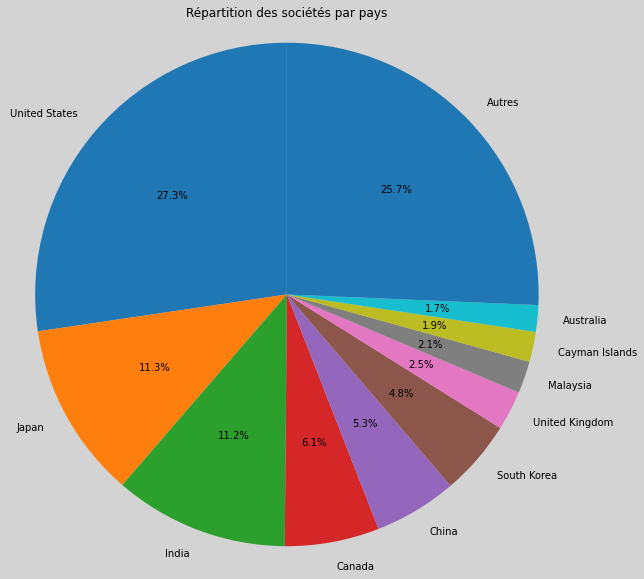

In [52]:
import matplotlib.pyplot as plt

# Compter le nombre de sociétés dans chaque pays
company_count = unique_rows['Country'].value_counts()

# Garder seulement les 10 premiers pays
top_10 = company_count[:10]

# Ajouter une autre catégorie pour tous les autres pays
other = company_count[10:].sum()
top_10['Autres'] = other

# Afficher le nombre de sociétés pour les 10 premiers pays et les autres
for country, count in top_10.items():
    print(f"{country}: {count} société(s)")

# Créer une grande figure
plt.figure(figsize=(10,10))

# Créer un diagramme circulaire
plt.pie(top_10, labels = top_10.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Assure que le diagramme est bien un cercle.
plt.title('Répartition des sociétés par pays')
plt.show()


# la frequence d'apparaision de USA

In [20]:
# Calculer la fréquence d'appartenance aux États-Unis
frequence_usa = (unique_rows['Country'] == 'United States').mean()

# Afficher la fréquence
print("Fréquence d'appartenance aux États-Unis :", frequence_usa)

Fréquence d'appartenance aux États-Unis : 0.27230311730926987


# les companies qui ont plus qu'un secteur  

In [21]:
# Effectuer le groupement par nom de société et compter le nombre de secteurs uniques
company_sectors = unique_rows.groupby('column1')['Sector'].nunique()

# Filtrer les noms de société qui ont plus d'un secteur
multi_sector_companies = company_sectors[company_sectors > 1]

# Afficher les noms de société qui ont plus d'un secteur
unique_rows

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
0,10x Genomics Inc. Class A Common Stock,10x Genomics,NaN,United States,Medical Equipment & Supplies,Health Care,10x genomics
2,1933 Industries Inc,1933 Industries,TGIF,Canada,Biotechnology & Pharmaceuticals,Health Care,1933 industries
3,1Life Healthcare Inc,1Life Healthcare,ONEM,United States,Software & IT Services,Technology & Communications,1life healthcare
4,1st Source Corporation Common Stock,1st Source,NaN,United States,Commercial Banks,Financials,1st source
5,"22nd Century Group, Inc.",22nd Century Group,XXII,United States,Tobacco,Food & Beverage,22nd century group
...,...,...,...,...,...,...,...
23150,Zymergen Inc,Zymergen,ZY,United States,Chemicals,Resource Transformation,zymergen
23151,"Zynerba Pharmaceuticals, Inc.",Zynerba Pharmaceuticals,ZYNE,United States,Biotechnology & Pharmaceuticals,Health Care,zynerba pharmaceuticals
23152,Zynex Inc. Common Stock,Zynex,NaN,United States,Medical Equipment & Supplies,Health Care,zynex
23153,Zynga Inc.,Zynga,ZNGA,United States,Software & IT Services,Technology & Communications,zynga


In [22]:
# Trier le dataset selon la colonne "name_company_cleaned"
sorted_dataset = unique_rows.sort_values(by='Name_company_cleaned')

# Afficher le dataset trié
sorted_dataset.head(50)

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
0,10x Genomics Inc. Class A Common Stock,10x Genomics,NaN,United States,Medical Equipment & Supplies,Health Care,10x genomics
2,1933 Industries Inc,1933 Industries,TGIF,Canada,Biotechnology & Pharmaceuticals,Health Care,1933 industries
3,1Life Healthcare Inc,1Life Healthcare,ONEM,United States,Software & IT Services,Technology & Communications,1life healthcare
4,1st Source Corporation Common Stock,1st Source,NaN,United States,Commercial Banks,Financials,1st source
5,"22nd Century Group, Inc.",22nd Century Group,XXII,United States,Tobacco,Food & Beverage,22nd century group
6,2Curex Ab,2Curex,2CUREX,Sweden,Medical Equipment & Supplies,Health Care,2curex
9,2U Inc. Common Stock,2U,NaN,United States,Software & IT Services,Technology & Communications,2u
8,2seventy bio Inc,2seventy bio,TSVT,United States,Biotechnology & Pharmaceuticals,Health Care,2seventy bio
11,3D Systems Corporation Common Stock,3D Systems,NaN,United States,Hardware,Technology & Communications,3d systems
13,3i Group PLC,3i Group,TGOPY,United States,Asset Management & Custody Activities,Financials,3i group


In [23]:
# Extraire les deux premières colonnes du dataset trié
extracted_dataset = sorted_dataset.iloc[:, :2]

# Afficher le nouveau dataset avec les deux premières colonnes
extracted_dataset

,Name_company,Name_company_cleaned
0,10x Genomics Inc. Class A Common Stock,10x Genomics
2,1933 Industries Inc,1933 Industries
3,1Life Healthcare Inc,1Life Healthcare
4,1st Source Corporation Common Stock,1st Source
5,"22nd Century Group, Inc.",22nd Century Group
...,...,...
22148,voestalpine AG,voestalpine
22382,west indian tobacco,west indian tobacco
23115,zooplus AG,zooplus
23116,zooplus AG,zooplus


In [24]:
# Supprimer les lignes redondantes de la nouvelle dataset
unique_Name = extracted_dataset.drop_duplicates()

# Afficher la nouvelle dataset sans les lignes redondantes
print(unique_Name.shape)
unique_Name

(18255, 2)


,Name_company,Name_company_cleaned
0,10x Genomics Inc. Class A Common Stock,10x Genomics
2,1933 Industries Inc,1933 Industries
3,1Life Healthcare Inc,1Life Healthcare
4,1st Source Corporation Common Stock,1st Source
5,"22nd Century Group, Inc.",22nd Century Group
...,...,...
22196,vTv Therapeutics Inc. Class A Common Stock,vTv Therapeutics
22149,voestalpine AG,voestalpine
22382,west indian tobacco,west indian tobacco
23115,zooplus AG,zooplus


In [25]:
# Extraire les deux premières colonnes du dataset trié
X = unique_Name
X.to_csv('X.csv', index=False)
# Afficher le nouveau dataset avec les deux premières colonnes
X

,Name_company,Name_company_cleaned
0,10x Genomics Inc. Class A Common Stock,10x Genomics
2,1933 Industries Inc,1933 Industries
3,1Life Healthcare Inc,1Life Healthcare
4,1st Source Corporation Common Stock,1st Source
5,"22nd Century Group, Inc.",22nd Century Group
...,...,...
22196,vTv Therapeutics Inc. Class A Common Stock,vTv Therapeutics
22149,voestalpine AG,voestalpine
22382,west indian tobacco,west indian tobacco
23115,zooplus AG,zooplus


# Les noms contenants un seul mot  : 

In [26]:
# Définir une expression régulière pour les noms d'un seul mot
pattern = r'^\w+$'

# Filtrer les noms qui correspondent au modèle
single_word_names = X[X['Name_company'].str.match(pattern, na=False)]

# Afficher les noms extraits

# Sauvegarder les noms extraits dans un nouveau fichier CSV
single_word_names.to_csv('single_word_names.csv', index=False)

single_word_names


,Name_company,Name_company_cleaned
390,ADWYA,ADWYA
395,AECOM,AECOM
597,AHNLAB,AHNLAB
1425,APTC,APTC
1430,APURES,APURES
...,...,...
22963,Zellidja,Zellidja
6874,ezCaretech,ezCaretech
9619,i3system,i3system
11101,kakaobank,kakaobank


# Les noms contenants les chiffres :  

In [27]:
# Extraire les noms contenant des chiffres
names_with_digits = X[X['Name_company'].str.contains(r'\d', na=False)]


# Sauvegarder les noms extraits dans un nouveau fichier CSV
names_with_digits.to_csv('names_with_digits.csv', index=False)

names_with_digits

,Name_company,Name_company_cleaned
0,10x Genomics Inc. Class A Common Stock,10x Genomics
2,1933 Industries Inc,1933 Industries
3,1Life Healthcare Inc,1Life Healthcare
4,1st Source Corporation Common Stock,1st Source
5,"22nd Century Group, Inc.",22nd Century Group
...,...,...
22820,Yield10 Bioscience Inc. Common Stock,Yield10 Bioscience
9348,home24 SE,home24
9616,i3 Energy plc,i3 Energy
9617,i3 Verticals Inc. Class A Common Stock,i3 Verticals


# Les noms contenants des ponctuations :  

In [28]:
# Définir une expression régulière pour les noms contenant des ponctuations
pattern = r'\b\w*[^\w\s]\w*\b'

# Filtrer les noms qui correspondent au modèle
names_with_punctuation = X[X['Name_company'].str.contains(pattern, regex=True, na=False)]



# Sauvegarder les noms extraits dans un nouveau fichier CSV
names_with_punctuation.to_csv('names_with_punctuation.csv', index=False)

names_with_punctuation

,Name_company,Name_company_cleaned
54,AB&Company Co Ltd,AB
71,ABC Arbitrage S.A.,ABC Arbitrage
116,ABO-Group Environment N.V.,ABO Group Environment
186,ACERIAS PAZ DEL RIO S.A.,ACERIAS PAZ DEL RIO
313,ADMINISTRADORA DEL COMERCIO S.A.,ADMINISTRADORA DEL COMERCIO
...,...,...
949,alstria office REIT-AG,alstria office
6559,ePRICE S.p.A.,ePRICE
8241,"gooddays holdings,Inc.",gooddays holdings
18947,"sMedio,Inc.",sMedio


# Les noms contenants plus ce qu'un mot :  

In [29]:
# Extraire les noms contenant plus d'un mot
multi_word_names = X[X['Name_company'].str.split().str.len() > 1]


# Sauvegarder les noms extraits dans un nouveau fichier CSV
multi_word_names.to_csv('multi_word_names.csv', index=False)

multi_word_names

,Name_company,Name_company_cleaned
0,10x Genomics Inc. Class A Common Stock,10x Genomics
2,1933 Industries Inc,1933 Industries
3,1Life Healthcare Inc,1Life Healthcare
4,1st Source Corporation Common Stock,1st Source
5,"22nd Century Group, Inc.",22nd Century Group
...,...,...
22196,vTv Therapeutics Inc. Class A Common Stock,vTv Therapeutics
22149,voestalpine AG,voestalpine
22382,west indian tobacco,west indian tobacco
23115,zooplus AG,zooplus


# Les noms restants :  

In [30]:
# Définir une expression régulière pour les noms contenant plus d'un mot et sans ponctuation ni chiffre
pattern = r'^\b(?![\d\s\W_])\w+(?:\s+\w+)+\b$'

# Filtrer les noms qui correspondent au modèle
other_names = X[X['Name_company'].str.contains(pattern, regex=True, na=False)]



# Sauvegarder les noms extraits dans un nouveau fichier CSV
other_names.to_csv('other_names.csv', index=False)

other_names

,Name_company,Name_company_cleaned
27,A SPAC I Acquisition Corp,A SPAC I Acquisition
29,A2A SpA,A2A
31,A2B Australia Ltd,A2B Australia
32,A2Z Infra Engineering Ltd,A2Z Infra Engineering
33,AA Plus Tradelink Ltd,AA Plus Tradelink
...,...,...
18811,sinops Inc,sinops
20686,tmc Content Group AG,tmc Content Group
22149,voestalpine AG,voestalpine
22382,west indian tobacco,west indian tobacco


# Quelque observation des noms des companies :  

# les noms contenant un lettre 

In [31]:
# Extraire les noms d'une seule lettre
noms_une_lettre = X.loc[X['Name_company_cleaned'].str.len() == 1, 'Name_company_cleaned'].tolist()

# Afficher la liste des noms d'une seule lettre
print(noms_une_lettre)

[]


## => Il n' y a pas des noms contenants une seule lettre 

# les noms contenant deux lettres

In [32]:
# Extraire les noms d'une seule lettre
noms_deux_lettres = X.loc[X['Name_company_cleaned'].str.len() == 2, 'Name_company_cleaned'].tolist()

# Afficher la liste des noms d'une seule lettre
print(noms_deux_lettres)

['2U', 'AB', 'AB', 'AI', 'DB', 'DB', 'Do', 'EQ', 'GA', 'Ga', 'HL', 'JK', 'Q4', 'ST', 'St', 'Ve', 'YY']


## => AB se repete deux fois , !!! ... malgre qu'on a supprime les duplication  
## Il y a aussi ST et St  ... !!!

### Je vais a  de unique_rows extrait ces deux lignes qui portent la valeur { AB } et { ST et St } 

In [33]:
# Extraire les lignes correspondantes
noms_specifiques = unique_rows[unique_rows['Name_company_cleaned'].isin(['AB', 'ST', 'St'])]

# Afficher les lignes correspondantes
noms_specifiques

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
53,AB SA,AB,ABE,Poland,Multiline and Specialty Retailers & Distributors,Consumer Goods,ab
54,AB&Company Co Ltd,AB,9251,Japan,Asset Management & Custody Activities,Financials,ab
19314,ST Corp,ST,4951,Japan,Household & Personal Products,Consumer Goods,st
19315,Streit Mecanique SA,St,MLSTR,France,Auto Parts,Transportation,st


###  AB Poland est vrai company 
### AB Japon !!!!!!!!!!  en japon on  a  AB&Company

### =>  ST en japon est ST corporation 

# ???

# les noms contenants 3 lettres : 

In [34]:
# Extraire les noms d'une seule lettre
noms_trois_lettre = X.loc[X['Name_company_cleaned'].str.len() == 3, 'Name_company_cleaned'].tolist()

# Afficher la liste des noms d'une seule lettre
print(noms_trois_lettre)
print('\n')

# Vérifier les redondances dans la liste
redondances = [x for x in noms_trois_lettre if noms_trois_lettre.count(x) > 1]
print(f'les noms redendandants sont \n', redondances )

['8x8', 'A2A', 'ABB', 'AGC', 'AGP', 'AGP', 'AKR', 'AVI', 'AXA', 'BRF', 'Bra', 'Bra', 'CAR', 'CCS', 'CNB', 'CSL', 'Cdw', 'ECA', 'ECA', 'EO2', 'EQT', 'EVN', 'Eat', 'Emu', 'Eqt', 'GEM', 'GEM', 'Geo', 'Geo', 'IGO', 'IMI', 'Iph', 'JBS', 'JGC', 'JGC', 'JLS', 'K S', 'K S', 'Lkq', 'MMG', 'MNB', 'MTR', 'NIC', 'NIO', 'NSK', 'NTS', 'Nic', 'Nio', 'Nor', 'OMV', 'PGT', 'PSC', 'Pgt', 'Pro', 'Qad', 'RBC', 'RBC', 'RPC', 'RPC', 'RTL', 'RVH', 'Rli', 'SAP', 'SBC', 'SBC', 'SDI', 'SDI', 'SEA', 'SEB', 'SMC', 'SOS', 'Sea', 'TIM', 'Tim', 'Toa', 'Udr', 'VRG', 'WEG', 'WMG', 'WPP', 'YIT', 'YIT', 'YPF', 'ZUE', 'ZUU', 'Zip', 'ams', 'iGO']


les noms redendandants sont 
 ['AGP', 'AGP', 'Bra', 'Bra', 'ECA', 'ECA', 'GEM', 'GEM', 'Geo', 'Geo', 'JGC', 'JGC', 'K S', 'K S', 'RBC', 'RBC', 'RPC', 'RPC', 'SBC', 'SBC', 'SDI', 'SDI', 'YIT', 'YIT']


In [35]:
# Vérifier les redondances dans la liste
redondances = [x for x in noms_trois_lettre if noms_trois_lettre.count(x) > 1]
print(redondances)

['AGP', 'AGP', 'Bra', 'Bra', 'ECA', 'ECA', 'GEM', 'GEM', 'Geo', 'Geo', 'JGC', 'JGC', 'K S', 'K S', 'RBC', 'RBC', 'RPC', 'RPC', 'SBC', 'SBC', 'SDI', 'SDI', 'YIT', 'YIT']


In [36]:
# Extraire les lignes correspondantes
lignes_redondantes = unique_rows[unique_rows['Name_company_cleaned'].isin(redondances)]

# Afficher les lignes correspondantes
lignes_redondantes

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
561,AGP Ltd/PK,AGP,AGP,Pakistan,Biotechnology & Pharmaceuticals,Health Care,agp
562,AGP Corp,AGP,9377,Japan,Professional & Commercial Services,Services,agp
3143,BrainChip Holdings Ltd,Bra,BRN,Australia,Software & IT Services,Technology & Communications,bra
3144,BrainCool AB,Bra,BRAIN,Sweden,Medical Equipment & Supplies,Health Care,bra
6029,ECA,ECA,ECASA,France,Aerospace & Defense,Resource Transformation,eca
6030,ECA SA,ECA,ECA,Poland,Professional & Commercial Services,Services,eca
7799,GEM Co Ltd,GEM,GEM,United States,Waste Management,Infrastructure,gem
7800,GEM Co. .,GEM,2340,China,Waste Management,Infrastructure,gem
7895,Geo Corp.,Geo,2681,Japan,Multiline and Specialty Retailers & Distributors,Consumer Goods,geo
7896,Geo Ltd,Geo,GEO,New Zealand,Software & IT Services,Technology & Communications,geo


# => tous ses company dont de vrai nom , elles different dans les cunty 

# les noms contenants 3 lettres : 

In [37]:
# Extraire les noms d'une seule lettre
noms_trois_lettre = X.loc[X['Name_company_cleaned'].str.len() == 4, 'Name_company_cleaned'].tolist()

# Afficher la liste des noms d'une seule lettre
print(noms_trois_lettre)
print('\n')

# Vérifier les redondances dans la liste
redondances = [x for x in noms_trois_lettre if noms_trois_lettre.count(x) > 1]
print(f'les noms redendandants sont \n', redondances )

['ABKO', 'AECI', 'ALDA', 'APRO', 'APTC', 'ASAX', 'ASGN', 'ASOS', 'AT T', 'AT T', 'Acnb', 'Acom', 'Acom', 'Asta', 'Atco', 'Aton', 'Atos', 'Azul', 'Azul', 'BASF', 'BASF', 'BCNC', 'Bice', 'CBLT', 'CBLT', 'CEAT', 'CONX', 'CRRC', 'CYAN', 'Cbiz', 'Cohu', 'Ctac', 'Dook', 'Dual', 'EMRO', 'ENBD', 'EXSA', 'Ebix', 'Ecit', 'Enel', 'Etsy', 'FACC', 'FACC', 'Fila', 'Fila', 'Fuji', 'GATX', 'GIIR', 'GIMV', 'Geox', 'Gift', 'Gimv', 'Grab', 'Grab', 'HKBN', 'Hays', 'Hims', 'Ht E', 'IDEX', 'IFCI', 'ISMT', 'ITEX', 'Icad', 'Idex', 'Ilya', 'Ines', 'Irce', 'Iren', 'Ixup', 'JMDC', 'JOYY', 'Jatu', 'Jeol', 'Juki', 'Juki', 'KINX', 'KITZ', 'KOAS', 'KTCS', 'KTMG', 'Keio', 'Kone', 'Kose', 'Koyj', 'Kruk', 'LCNB', 'LEAD', 'LINE', 'Lead', 'Life', 'Life', 'Line', 'Link', 'MARR', 'MESB', 'MIXI', 'MOIL', 'MPLX', 'MSCI', 'Maca', 'Mera', 'Moog', 'Mowi', 'NNRF', 'Naga', 'PCCW', 'PLDT', 'Paru', 'QIWI', 'Qiwi', 'Qumu', 'RIO2', 'RSWM', 'RTCL', 'Rifa', 'Rio2', 'SCGM', 'SCOR', 'SCVX', 'SCVX', 'SOHM', 'Seco', 'Seed', 'Seed', 'Siix',

In [38]:
# Extraire les lignes correspondantes
lignes_redondantes = unique_rows[unique_rows['Name_company_cleaned'].isin(redondances)]

# Afficher les lignes correspondantes
lignes_redondantes

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
214,Acom Co. .,Acom,8572,Japan,Consumer Finance,Financials,acom
215,Acom Co Ltd,Acom,ACMUY,United States,Consumer Finance,Financials,acom
1911,AT&T Inc,AT T,T3,Argentina,Telecommunication Services,Technology & Communications,at t
1912,AT&T Inc.,AT T,T,United States,Telecommunication Services,Technology & Communications,at t
2271,Azul S.A. ADR,Azul,AZUL,United States,Leisure Facilities,Services,azul
2272,Azul SA,Azul,AZUL4,Brazil,Airlines,Transportation,azul
2543,BASF SE,BASF,BASF,Italy,Chemicals,Resource Transformation,basf
2544,BASF SE,BASF,BASFY,United States,Chemicals,Resource Transformation,basf
3733,CBLT Inc.,CBLT,CBBLF,United States,Asset Management & Custody Activities,Financials,cblt
3734,CBLT Inc,CBLT,CBLT,Canada,Asset Management & Custody Activities,Financials,cblt


In [39]:
X

,Name_company,Name_company_cleaned
0,10x Genomics Inc. Class A Common Stock,10x Genomics
2,1933 Industries Inc,1933 Industries
3,1Life Healthcare Inc,1Life Healthcare
4,1st Source Corporation Common Stock,1st Source
5,"22nd Century Group, Inc.",22nd Century Group
...,...,...
22196,vTv Therapeutics Inc. Class A Common Stock,vTv Therapeutics
22149,voestalpine AG,voestalpine
22382,west indian tobacco,west indian tobacco
23115,zooplus AG,zooplus


# Le mot le plus freequent dans le dataset  X 


In [40]:
# Trouver les 10 premiers mots les plus redondants dans la colonne "Name_company"
top_mots_name_company = X['Name_company'].astype(str).str.split().explode().value_counts().head(20)

# Trouver les 10 premiers mots les plus redondants dans la colonne "Name_company_cleaned"
top_mots_name_company_cleaned = X['Name_company_cleaned'].astype(str).str.split().explode().value_counts().head(50)

# Afficher les 10 premiers mots les plus redondants dans chaque colonne
print("Les 10 premiers mots les plus redondants dans 'Name_company' :\n", top_mots_name_company)
print("\nLes 10 premiers mots les plus redondants dans 'Name_company_cleaned' :\n", top_mots_name_company_cleaned)


Les 10 premiers mots les plus redondants dans 'Name_company' :
 Ltd              3839
.                2257
Inc.             2039
Co               1670
Common           1376
Stock            1344
Inc              1299
Group            1093
Corp             1082
Co.               890
Corp.             669
Holdings          616
A                 611
SA                555
Corporation       524
Industries        443
International     432
Acquisition       422
PLC               388
Bhd               365
Name: Name_company, dtype: int64

Les 10 premiers mots les plus redondants dans 'Name_company_cleaned' :
 Group              1137
Holdings            661
Industries          471
International       443
Acquisition         421
Energy              342
Technologies        306
Technology          282
Resources           279
Holding             274
Investment          229
Capital             226
Financial           216
Bank                202
Global              181
PCL                 162
Servic

In [41]:
# Trouver les 10 premiers mots les plus redondants dans la colonne "Name_company"
top_mots_name_company = X['Name_company'].astype(str).str.split().explode().value_counts().head(10)

# Trouver les 10 premiers mots les plus redondants dans la colonne "Name_company_cleaned"
top_mots_name_company_cleaned = X['Name_company_cleaned'].astype(str).str.split().explode().value_counts().head(10)

# Extraire les lignes correspondant aux mots les plus redondants dans chaque colonne
lignes_name_company = X[X['Name_company'].astype(str).str.contains('|'.join(top_mots_name_company.index))]
lignes_name_company_cleaned = X[X['Name_company_cleaned'].astype(str).str.contains('|'.join(top_mots_name_company_cleaned.index))]

lignes_name_company.head(50)


,Name_company,Name_company_cleaned
0,10x Genomics Inc. Class A Common Stock,10x Genomics
2,1933 Industries Inc,1933 Industries
3,1Life Healthcare Inc,1Life Healthcare
4,1st Source Corporation Common Stock,1st Source
5,"22nd Century Group, Inc.",22nd Century Group
6,2Curex Ab,2Curex
9,2U Inc. Common Stock,2U
8,2seventy bio Inc,2seventy bio
11,3D Systems Corporation Common Stock,3D Systems
13,3i Group PLC,3i Group


In [42]:
lignes_name_company_cleaned.head(50)

,Name_company,Name_company_cleaned
2,1933 Industries Inc,1933 Industries
5,"22nd Century Group, Inc.",22nd Century Group
13,3i Group PLC,3i Group
17,4Sight Holdings Ltd,4Sight Holdings
22,8i Acquisition 2 Corp. Ordinary Shares,8i Acquisition 2
24,8i Enterprises Acquisition Corp,8i Enterprises Acquisition
27,A SPAC I Acquisition Corp,A SPAC I Acquisition
35,AAC Technologies Holdings Inc,AAC Technologies Holdings
76,ABC Technologies Inc.,ABC Technologies
78,ABC Technologies Holdings Inc.,ABC Technologies Holdings


In [43]:
# # Trouver les 10 premiers mots les plus redondants dans la colonne "Name_company"
# top_mots_name_company = X['Name_company'].astype(str).str.split().explode().value_counts().head(10)

# # Trouver les positions de chaque mot dans la chaîne pour la colonne "Name_company"
# positions_name_company = {}
# for mot in top_mots_name_company.index:
#     positions_name_company[mot] = []
#     for idx, row in X.iterrows():
#         name_company = str(row['Name_company'])
#         positions = [i for i, mot_chaine in enumerate(name_company.split()) if mot_chaine == mot]
#         if positions:
#             positions_name_company[mot].extend([(idx, p) for p in positions])

# # Trouver les 10 premiers mots les plus redondants dans la colonne "Name_company_cleaned"
# top_mots_name_company_cleaned = X['Name_company_cleaned'].astype(str).str.split().explode().value_counts().head(10)

# # Trouver les positions de chaque mot dans la chaîne pour la colonne "Name_company_cleaned"
# positions_name_company_cleaned = {}
# for mot in top_mots_name_company_cleaned.index:
#     positions_name_company_cleaned[mot] = []
#     for idx, row in X.iterrows():
#         name_company_cleaned = str(row['Name_company_cleaned'])
#         positions = [i for i, mot_chaine in enumerate(name_company_cleaned.split()) if mot_chaine == mot]
#         if positions:
#             positions_name_company_cleaned[mot].extend([(idx, p) for p in positions])

# # Afficher les positions de chaque mot dans la chaîne pour chaque colonne
# print("Positions des mots les plus redondants dans 'Name_company' :\n", positions_name_company)
# print("\nPositions des mots les plus redondants dans 'Name_company_cleaned' :\n", positions_name_company_cleaned)


In [44]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install python-igraph

In [46]:
pip install cairocffi

Note: you may need to restart the kernel to use updated packages.


In [47]:
import igraph as ig

# Création d'un graphe aléatoire
graph = ig.Graph.GRG(100, 0.2)

# Affichage du graphe
layout = graph.layout("fr")
ig.plot(graph, layout=layout)

OSError: no library called "cairo-2" was found
no library called "libcairo-2" was found
cannot load library 'C:\Users\haykel.bargougui\Downloads\windows_10_msbuild_Release_graphviz-8.0.5-win32\Graphviz\bin\cairo.dll': error 0xc1
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Charger le dataset unique_rows
unique_rows = pd.read_csv('unique_rows.csv')

# Remplacer les valeurs NA ou NaN par une chaîne de caractères vide dans la colonne "Name_company"
unique_rows['Name_company'] = unique_rows['Name_company'].fillna('')

# Trouver les mots redondants dans la colonne "Name_company"
mots_redondants = ['ltd', 'inc']  # Remplacez par les mots redondants que vous avez identifiés

# Créer le dictionnaire pour stocker les données
data = {}

# Parcourir chaque mot redondant
for mot in mots_redondants:
    # Filtrer les lignes correspondant au mot redondant
    lignes_mot_redondant = unique_rows[unique_rows['Name_company'].str.contains(mot)]

    # Créer le graphique arborescent avec Plotly
    fig = go.Figure(go.Treemap(
        labels=lignes_mot_redondant['Country'],
        parents=['' for _ in lignes_mot_redondant['Country']],
        values=[1 for _ in lignes_mot_redondant['Country']],
        branchvalues='total'
    ))

    # Ajouter le graphique arborescent au dictionnaire de données
    data[mot] = fig

# Afficher les graphiques arborescents
for mot, fig in data.items():
    fig.show()
    


In [ ]:
import plotly.express as px

# Données pour le graphique arborescent
labels = ['A', 'B', 'C', 'D', 'E', 'F']
parents = ['', '', '', 'A', 'A', 'C']
values = [10, 20, 15, 5, 7, 9]

# Création du graphique arborescent avec Plotly Express
fig = px.treemap(
    names=labels,
    parents=parents,
    values=values
)

# Affichage du graphique
fig.show()
